Import Python Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib as plt
%matplotlib inline

Read in Wisconsin Breast Cancer Dataset

In [2]:
columns = ['idNumber', 'diagnosis', 'meanRadius', 'meanTexture', 'meanPerimeter', 'meanArea', 'meanSmoothness',
          'meanCompactness', 'meanConcavity', 'meanConcavePoints', 'meanSymmetry', 'meanFractalDimension',
          'radiusSE', 'textureSE', 'perimeterSE', 'areaSE', 'smoothnessSE',
          'compactnessSE', 'concavitySE', 'concavePointsSE', 'symmetrySE', 'fractalDimensionSE', 
           'worstRadius', 'worstTexture', 'worstPerimeter', 'worstArea', 'worstSmoothness',
          'worstCompactness', 'worstConcavity', 'worstConcavePoints', 'worstSymmetry', 'worstFractalDimension']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", names=columns)
df.head()

,idNumber,diagnosis,meanRadius,meanTexture,meanPerimeter,meanArea,meanSmoothness,meanCompactness,meanConcavity,meanConcavePoints,...,worstRadius,worstTexture,worstPerimeter,worstArea,worstSmoothness,worstCompactness,worstConcavity,worstConcavePoints,worstSymmetry,worstFractalDimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Split Dataset Into Data Features and Target

In [3]:
target = df['diagnosis'].values
#target = df['diagnosis']
features = df[[x for x in columns if x not in ['idNumber', 'diagnosis']]].values
#features = df[['meanRadius', 'meanTexture', 'meanPerimeter', 'meanArea', 'meanSmoothness',
#          'meanCompactness', 'meanConcavity', 'meanConcavePoints', 'meanSymmetry', 'meanFractalDimension',
#          'radiusSE', 'textureSE', 'perimeterSE', 'areaSE', 'smoothnessSE',
#          'compactnessSE', 'concavitySE', 'concavePointsSE', 'symmetrySE', 'fractalDimensionSE', 
#           'worstRadius', 'worstTexture', 'worstPerimeter', 'worstArea', 'worstSmoothness',
#          'worstCompactness', 'worstConcavity', 'worstConcavePoints', 'worstSymmetry', 'worstFractalDimension']]
features.shape

(569, 30)

Build a logit model and fit

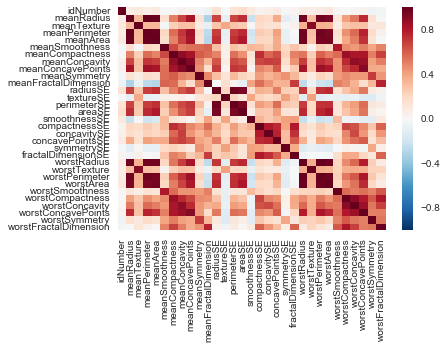

In [4]:
sns.heatmap(df.corr())

Prepare test data and predict

In [5]:
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform',
                           p=2,
                           metric='minkowski')

cv_indices = cross_validation.StratifiedKFold(target, n_folds=3)

In [6]:
knn.fit(features, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
#So this is the probability of not making any errors. If you get 1000 data points, 94% of your results will be correct
#and the remainder will be messed up.

knn.score(features, target)

0.9472759226713533

In [8]:
predictors = df.iloc[250:, 2:]
predict = list(knn.predict(predictors))
actual = list(df.iloc[250:, 1])

print predict
print actual
print predict.count('M'), actual.count('M'), predict.count('B'), actual.count('B')
#print knn.predict_proba(predictors)

['M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',

In [9]:
#to get the accuracy for this particular prediction, it's 51+16/51+16+1+1 = .97, or 97% accurate
print confusion_matrix(predict, actual, labels = ['B', 'M'])

[[226   6]
 [  5  82]]


In [10]:
knn.predict_proba(predictors)

array([[ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0.4,  0.6],
       [ 0. ,  1. ],
       [ 0.2,  0.8],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 0.2,  0.8],
       [ 0. ,  1. ],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.2,  0.8],
       [ 0.6,  0.4],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 1. ,  0. ],
       [ 0. ,  1. ],
       [ 0.2,  0.8],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.8,

In [11]:
logit = LogisticRegression()
logit.fit(features, target)
logit.score(features, target)

0.95957820738137078

In [12]:
print logit.score(features, target) - knn.score(features, target)

0.01230228471


In [13]:
def accuracy_crossvalidator(features, target, knn, cv_indices):
    scores = []
    for train_i, test_i in cv_indices:
        features_train = features[train_i, :]
        features_test = features[test_i, :]

        target_train = target[train_i]
        target_test = target[test_i]

        knn.fit(features_train, target_train)
        
        acc = knn.score(features_test, target_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))

accuracy_crossvalidator(features, target, knn, cv_indices)

('Fold accuracy:', 0.90000000000000002)
('Fold accuracy:', 0.94736842105263153)
('Fold accuracy:', 0.92063492063492058)
('Mean CV accuracy:', 0.92266778056251741)
